## Stock Price Prediction using LSTM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# loading the dataset

In [46]:
df = pd.read_csv('cleaned_data.csv')

In [47]:
df.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume,Price Range
0,ADBL,2024-08-29,0.250027,0.199940,0.146141,0.120129,-0.952723,1.689270,0.802583
1,ADBL,2024-08-28,0.166617,0.250327,0.188646,0.183898,0.059098,1.724917,0.929513
2,ADBL,2024-08-27,0.323010,0.271922,0.199272,0.178671,-2.523400,3.744562,1.084651
3,ADBL,2024-08-25,0.383481,0.457018,0.403296,0.356387,-1.735120,3.234141,0.915410
4,ADBL,2024-08-22,0.468976,0.510490,0.531874,0.481833,-0.570349,1.871657,-0.057727


# Feature and Target Variable

In [48]:
# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Percent Change', 'Volume', 'Price Range']
target = 'Close'


# Scale  the Data

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Create and fit scaler for features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit scaler for target
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y.reshape(-1, 1))


# Create Sequences

In [50]:
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

# Define sequence length
seq_length = 60

# Create sequences
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)


In [51]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


## Model Definition and Training

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Niru Dhaubanjar\anaconda3\envs\stock\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Train the model

In [53]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0665 - val_loss: nan
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0080 - val_loss: nan
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0059 - val_loss: nan
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0040 - val_loss: nan
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0033 - val_loss: nan
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0034 - val_loss: nan
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0028 - val_loss: nan
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0025 - val_loss: nan
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0030 - val_loss: nan
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0026 - val_loss: nan
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0024 - val_loss: nan
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0024 - val_loss: nan
Epoch 

# Evaluate Model

In [54]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: nan
Test Loss: nan


Adjusting Learning Rate

In [55]:
from tensorflow.keras.optimizers import Adam

# Define a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model again
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - loss: 0.0012 - val_loss: nan
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0013 - val_loss: nan
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0013 - val_loss: nan
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0011 - val_loss: nan
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 9.8223e-04 - val_loss: nan
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0010 - val_loss: nan
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0012 - val_loss: nan
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0014 - val_loss: nan
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0011 - val_loss: nan
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0011 - val_loss: nan
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0010 - val_loss: nan
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0011 - val_loss: nan
E

# Evaluate the Model

In [56]:
# Predict on test data
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step


# Inverse Trasform Predictions

In [57]:
# Initialize scaler for target variable
scaler_target = MinMaxScaler()
scaler_target.fit(df[[target]])

# Inverse transform predictions and actual values
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler_target.inverse_transform(y_pred)


# Plot Predictions

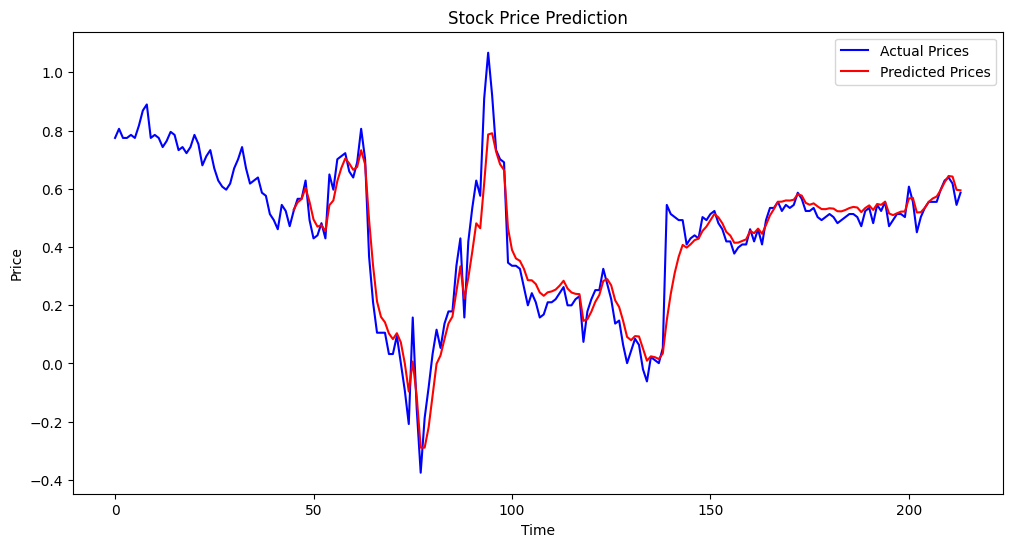

In [58]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Prices')
plt.plot(y_pred_actual, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Saving the Model

In [59]:
# Save the model
model.save('stock_price_lstm_model.h5')
print("Model saved as 'stock_price_lstm_model.h5'")


Model saved as 'stock_price_lstm_model.h5'


# Load and use the Model

In [60]:
# Load the model
loaded_model = tf.keras.models.load_model('stock_price_lstm_model.h5')



In [63]:
import pandas as pd

# Create example new data
example_new_data = {
    'Date': ['2024-08-30', '2024-08-31'],
    'Open': [0.250, 0.255],
    'High': [0.260, 0.265],
    'Low': [0.240, 0.245],
    'Close': [0.255, 0.260],
    'Percent Change': [0.020, 0.020],
    'Volume': [1.500, 1.600],
    'Price Range': [0.020, 0.020]
}

new_df = pd.DataFrame(example_new_data)

# Save to CSV
new_df.to_csv('new_data.csv', index=False)



In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the new data
new_df = pd.read_csv('new_data.csv')

# Define the features used during training
features = ['Open', 'High', 'Low', 'Close', 'Percent Change', 'Volume', 'Price Range']

# Normalize the features
scaler = MinMaxScaler()
scaled_features_new = scaler.fit_transform(new_df[features])

# Define sequence length
seq_length = 2  # Use a shorter sequence length for the example

def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i + seq_length])
    return np.array(X)

# Create sequences for new data
X_new = create_sequences(scaled_features_new, seq_length)


In [65]:
import tensorflow as tf

# Load the previously saved model
loaded_model = tf.keras.models.load_model('stock_price_lstm_model.h5')

# Make predictions
future_predictions = loaded_model.predict(X_new)

# Create a scaler_target with the same configuration used during training
scaler_target = MinMaxScaler()
scaler_target.fit(new_df[['Close']])  # Fit on the new data's target column

# Inverse transform predictions to original scale
future_predictions_actual = scaler_target.inverse_transform(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [66]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Date': new_df['Date'][seq_length-1:],  # Adjust index for predictions
    'Predicted': future_predictions_actual.flatten()
})

# Save to CSV
predictions_df.to_csv('future_predictions.csv', index=False)

print("Future predictions saved as 'future_predictions.csv'")


Future predictions saved as 'future_predictions.csv'
